<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt

# load train and test data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

# preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original, num_classes=10) 
test_labels = to_categorical(test_labels_original, num_classes=10)

# set up layers
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=784, activation=tf.nn.softmax)
])

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4196 - acc: 0.8835 - val_loss: 0.3105 - val_acc: 0.9151
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.3131 - acc: 0.9119 - val_loss: 0.2911 - val_acc: 0.9204
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2966 - acc: 0.9167 - val_loss: 0.2827 - val_acc: 0.9190
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2876 - acc: 0.9198 - val_loss: 0.2815 - val_acc: 0.9205
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2818 - acc: 0.9215 - val_loss: 0.2754 - val_acc: 0.9230
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2771 - acc: 0.9232 - val_loss: 0.2747 - val_acc: 0.9226
Epoch 7/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2738 - acc: 0.9233 - val_loss: 0.2758 - val_acc

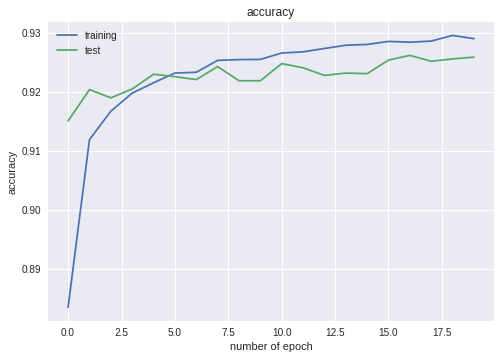

In [4]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of epoch')
plt.legend(['training', 'test'])
plt.show()

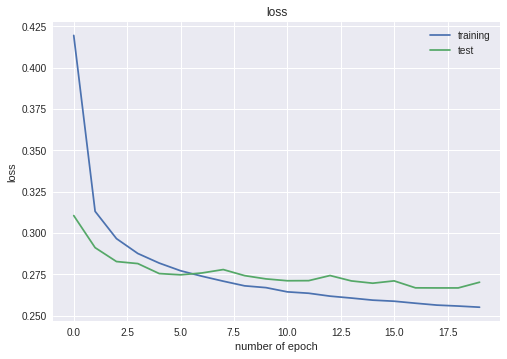

In [7]:
#loss plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('number of epoch')
plt.legend(['training', 'test'])
plt.show()